In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [104]:
df = pd.read_csv("/mnt/research/CMSE495-SS24-ICER/slurm_usage/DID_FINAL_SLURM_OCT_2023.csv",delimiter="|",nrows=1000000)

In [105]:
df

,Unnamed: 0,Unnamed: 0.1,JobID,User,Group,Submit,Start,End,Elapsed,State,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
1,1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
2,2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,...,0,12,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN
3,3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,...,0,640,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN
4,4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,...,360,40,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999999,999999,92914316,user_258,group_010,2023-10-05T10:50:51,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,162,1,1,NaN,1226228K,1,1,acm-015,NaN,"cpu=1,mem=505202M,node=1"
999996,1000000,1000000,92914316,user_258,group_010,2023-10-05T10:50:51,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,162,1,1,NaN,0,1,1,acm-015,NaN,"billing=76790,cpu=1,mem=505202M,node=1"
999997,1000001,1000001,92914316,user_178,group_154,2023-10-05T10:39:56,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,162,1,1,505202M,NaN,1,1,acm-000,"billing=76790,cpu=1,mem=505202M,node=1","billing=76790,cpu=1,mem=505202M,node=1"
999998,1000002,1000002,92914316,user_258,group_010,2023-10-05T10:50:51,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,162,1,1,NaN,1223748K,1,1,acm-000,NaN,"cpu=1,mem=505202M,node=1"


In [106]:
df["underutilizerCPUS"] = df['ReqCPUS']-df['AllocCPUS'] 
df["underutilizerNodes"] = df['ReqNodes']-df['NNodes'] 
df

,Unnamed: 0,Unnamed: 0.1,JobID,User,Group,Submit,Start,End,Elapsed,State,...,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES,underutilizerCPUS,underutilizerNodes
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN,28,0
1,1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,...,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN,28,0
2,2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,...,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN,12,0
3,3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,...,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN,640,0
4,4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,...,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999999,999999,92914316,user_258,group_010,2023-10-05T10:50:51,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,1,NaN,1226228K,1,1,acm-015,NaN,"cpu=1,mem=505202M,node=1",0,0
999996,1000000,1000000,92914316,user_258,group_010,2023-10-05T10:50:51,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,1,NaN,0,1,1,acm-015,NaN,"billing=76790,cpu=1,mem=505202M,node=1",0,0
999997,1000001,1000001,92914316,user_178,group_154,2023-10-05T10:39:56,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,1,505202M,NaN,1,1,acm-000,"billing=76790,cpu=1,mem=505202M,node=1","billing=76790,cpu=1,mem=505202M,node=1",0,0
999998,1000002,1000002,92914316,user_258,group_010,2023-10-05T10:50:51,2023-10-05T10:50:51,2023-10-05T10:53:33,00:02:42,COMPLETED,...,1,NaN,1223748K,1,1,acm-000,NaN,"cpu=1,mem=505202M,node=1",0,0


In [107]:
data_types=df.dtypes
data_types

Unnamed: 0             int64
Unnamed: 0.1           int64
JobID                  int64
User                  object
Group                 object
Submit                object
Start                 object
End                   object
Elapsed               object
State                 object
Account               object
AssocID               object
Partition             object
Timelimit             object
UserCPU               object
SystemCPU             object
TotalCPU              object
CPUTime               object
CPUTimeRAW             int64
ReqCPUS                int64
AllocCPUS              int64
ReqMem                object
MaxRSS                object
ReqNodes               int64
NNodes                 int64
NodeList              object
ReqTRES               object
AllocTRES             object
underutilizerCPUS      int64
underutilizerNodes     int64
dtype: object

In [4]:
features2=['CPUTimeRAW','ReqCPUS','AllocCPUS','ReqNodes','NNodes','underutilizerCPUS','underutilizerNodes']

In [43]:
##takes aprox 7 minutes to run even on HPCC

X=df[features2]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans()

param_grid = {
    'n_clusters': [2, 3, 4, 5],  
    'init': ['k-means++', 'random'],  
    'max_iter': [50,100, 200, 300, 400],
    'algorithm': ['elkan', 'auto','full']    
}
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Best Hyperparameters: {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5}
Best Silhouette Score: -2.0762928003522548e+16


In [6]:
df = pd.read_csv("/mnt/research/CMSE495-SS24-ICER/slurm_usage/DID_FINAL_SLURM_OCT_2023.csv",delimiter="|",nrows=1000000)
df["underutilizerCPUS"] = df['ReqCPUS']-df['AllocCPUS'] 
df["underutilizerNodes"] = df['ReqNodes']-df['NNodes'] 

df_pca=df[features2]
scaler = StandardScaler()
df_pca=scaler.fit_transform(df_pca)
pca = PCA(2)
df_pca = pca.fit_transform(df_pca)

df_pca

/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.41707517, -0.85673665],
       [ 0.41707517, -0.85673665],
       [ 0.00446842, -0.38743109],
       ...,
       [-0.26440472, -0.03486387],
       [-0.26440472, -0.03486387],
       [-0.26440443, -0.03486232]])

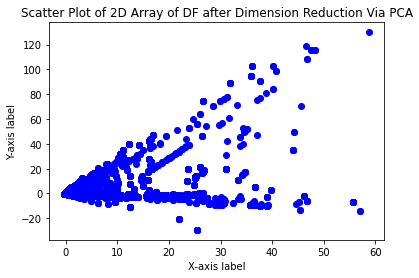

In [7]:
df_pca_scatter=df_pca.T
plt.scatter(df_pca_scatter[0], df_pca_scatter[1], marker='o', color='blue')

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of 2D Array of DF after Dimension Reduction Via PCA')

# Show the plot
plt.show()

In [8]:

df_pca.shape

(1000000, 2)

In [103]:
kmeans = KMeans()

param_grid = {
    'n_clusters': [2, 3, 4, 5],  
    'init': ['k-means++', 'random'],  
    'max_iter': [50,100, 200, 300, 400, 500],
    'algorithm': ['elkan', 'auto','full']    
}
grid_search = GridSearchCV(kmeans, param_grid,cv=5)
grid_search.fit(df_pca)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

KeyboardInterrupt: 

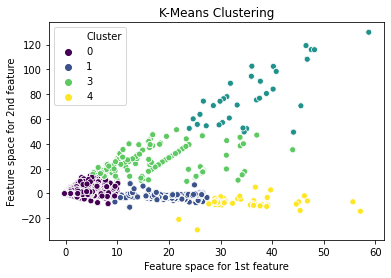

In [9]:
k=5
df_pca = pd.DataFrame(df_pca, columns=['Feature space for 1st feature', 'Feature space for 2nd feature'])
kmeans = KMeans(n_clusters=5,algorithm='auto',init='k-means++',max_iter=300)
kmeans.fit(df_pca)
labels = kmeans.labels_
df_pca['Cluster'] = labels
sns.scatterplot(x=df_pca['Feature space for 1st feature'], y=df_pca['Feature space for 2nd feature'], hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clustering')

plt.show()


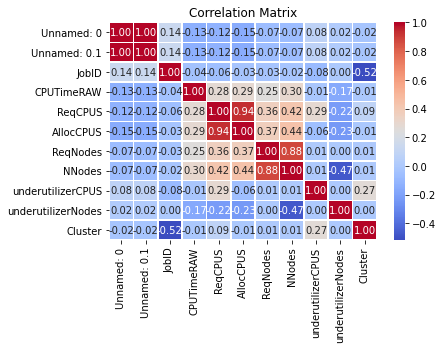

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##code to plot cluster

sns.scatterplot(x='underutilizerCPUS', y='underutilizerNodes', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('ReqCPUS')
plt.ylabel('AllocCPUS')
plt.show()



##simple kmeans cluster grid

for i in range(1,7):
    k=i
    X=df[features]
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    df['Cluster'] = labels
    sns.scatterplot(x='underutilizerCPUS', y='underutilizerNodes', hue='Cluster', data=df, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel('ReqCPUS')
    plt.ylabel('AllocCPUS')
    plt.show()